In [1]:
import pandas
import pickle
from IPython.display import display
from biotite.sequence.phylo import upgma
from matplotlib import pyplot
from io import StringIO
from Bio import Phylo

In [2]:
data_path = "../../../data"

In [3]:
df = pandas.read_csv(f"{data_path}/final_cluster_with_indelible.csv")

In [4]:
df.describe()

,Right,Total
count,345.000000,345.000000
mean,11.907246,22.695652
std,12.625536,11.924306
min,0.000000,14.000000
25%,0.000000,14.000000
50%,12.000000,14.000000
75%,14.000000,39.000000
max,39.000000,39.000000


In [5]:
df.sort_values(by=" Right").head(30)

,Algoritm,Name,Family,Right,Total
344,Universal Quality Index,cebus_capucinus_ENSCCAG00000020944.png,orthologs_neuroglobin,0,14
258,Universal Quality Index,D5.png,indelible,0,39
259,Universal Quality Index,D7.png,indelible,0,39
260,Universal Quality Index,D4.png,indelible,0,39
261,Universal Quality Index,D6.png,indelible,0,39
262,Universal Quality Index,A8.png,indelible,0,39
263,Universal Quality Index,C8.png,indelible,0,39
264,Universal Quality Index,A9.png,indelible,0,39
265,Universal Quality Index,C9.png,indelible,0,39
266,Universal Quality Index,B8.png,indelible,0,39


In [6]:
df.columns

Index(['Algoritm', ' Name', ' Family', ' Right', ' Total'], dtype='object')

In [7]:
df[df[" Right"] == df[" Total"]][' Name'].size / df[' Name'].size

0.2898550724637681

In [8]:
with open(f"{data_path}/cluster_sim_with_indelible.pkl", "rb") as f:
    sim_hash = pickle.load(f)

In [9]:
dfs_all = dict()
for alg, results in sim_hash.items():
    dfs_all[alg] = pandas.DataFrame.from_dict(results)

In [10]:
for df_all in dfs_all.values():
    df_all.columns = [c.split("/")[-3].split(".")[0] +"_"+ c.split("/")[-1].split(".")[0] for c in df_all.columns]
    df_all.index = [c.split("/")[-3].split(".")[0] +"_"+ c.split("/")[-1].split(".")[0] for c in df_all.index]

In [11]:
fixed_dfs_all = {}
numpys_all = {}
for alg, df_all in dfs_all.items():
    fixed_dfs_all[alg] = df_all.sort_index()[sorted(df_all.columns)]
    numpys_all[alg] = fixed_dfs_all[alg].to_numpy(na_value=0)

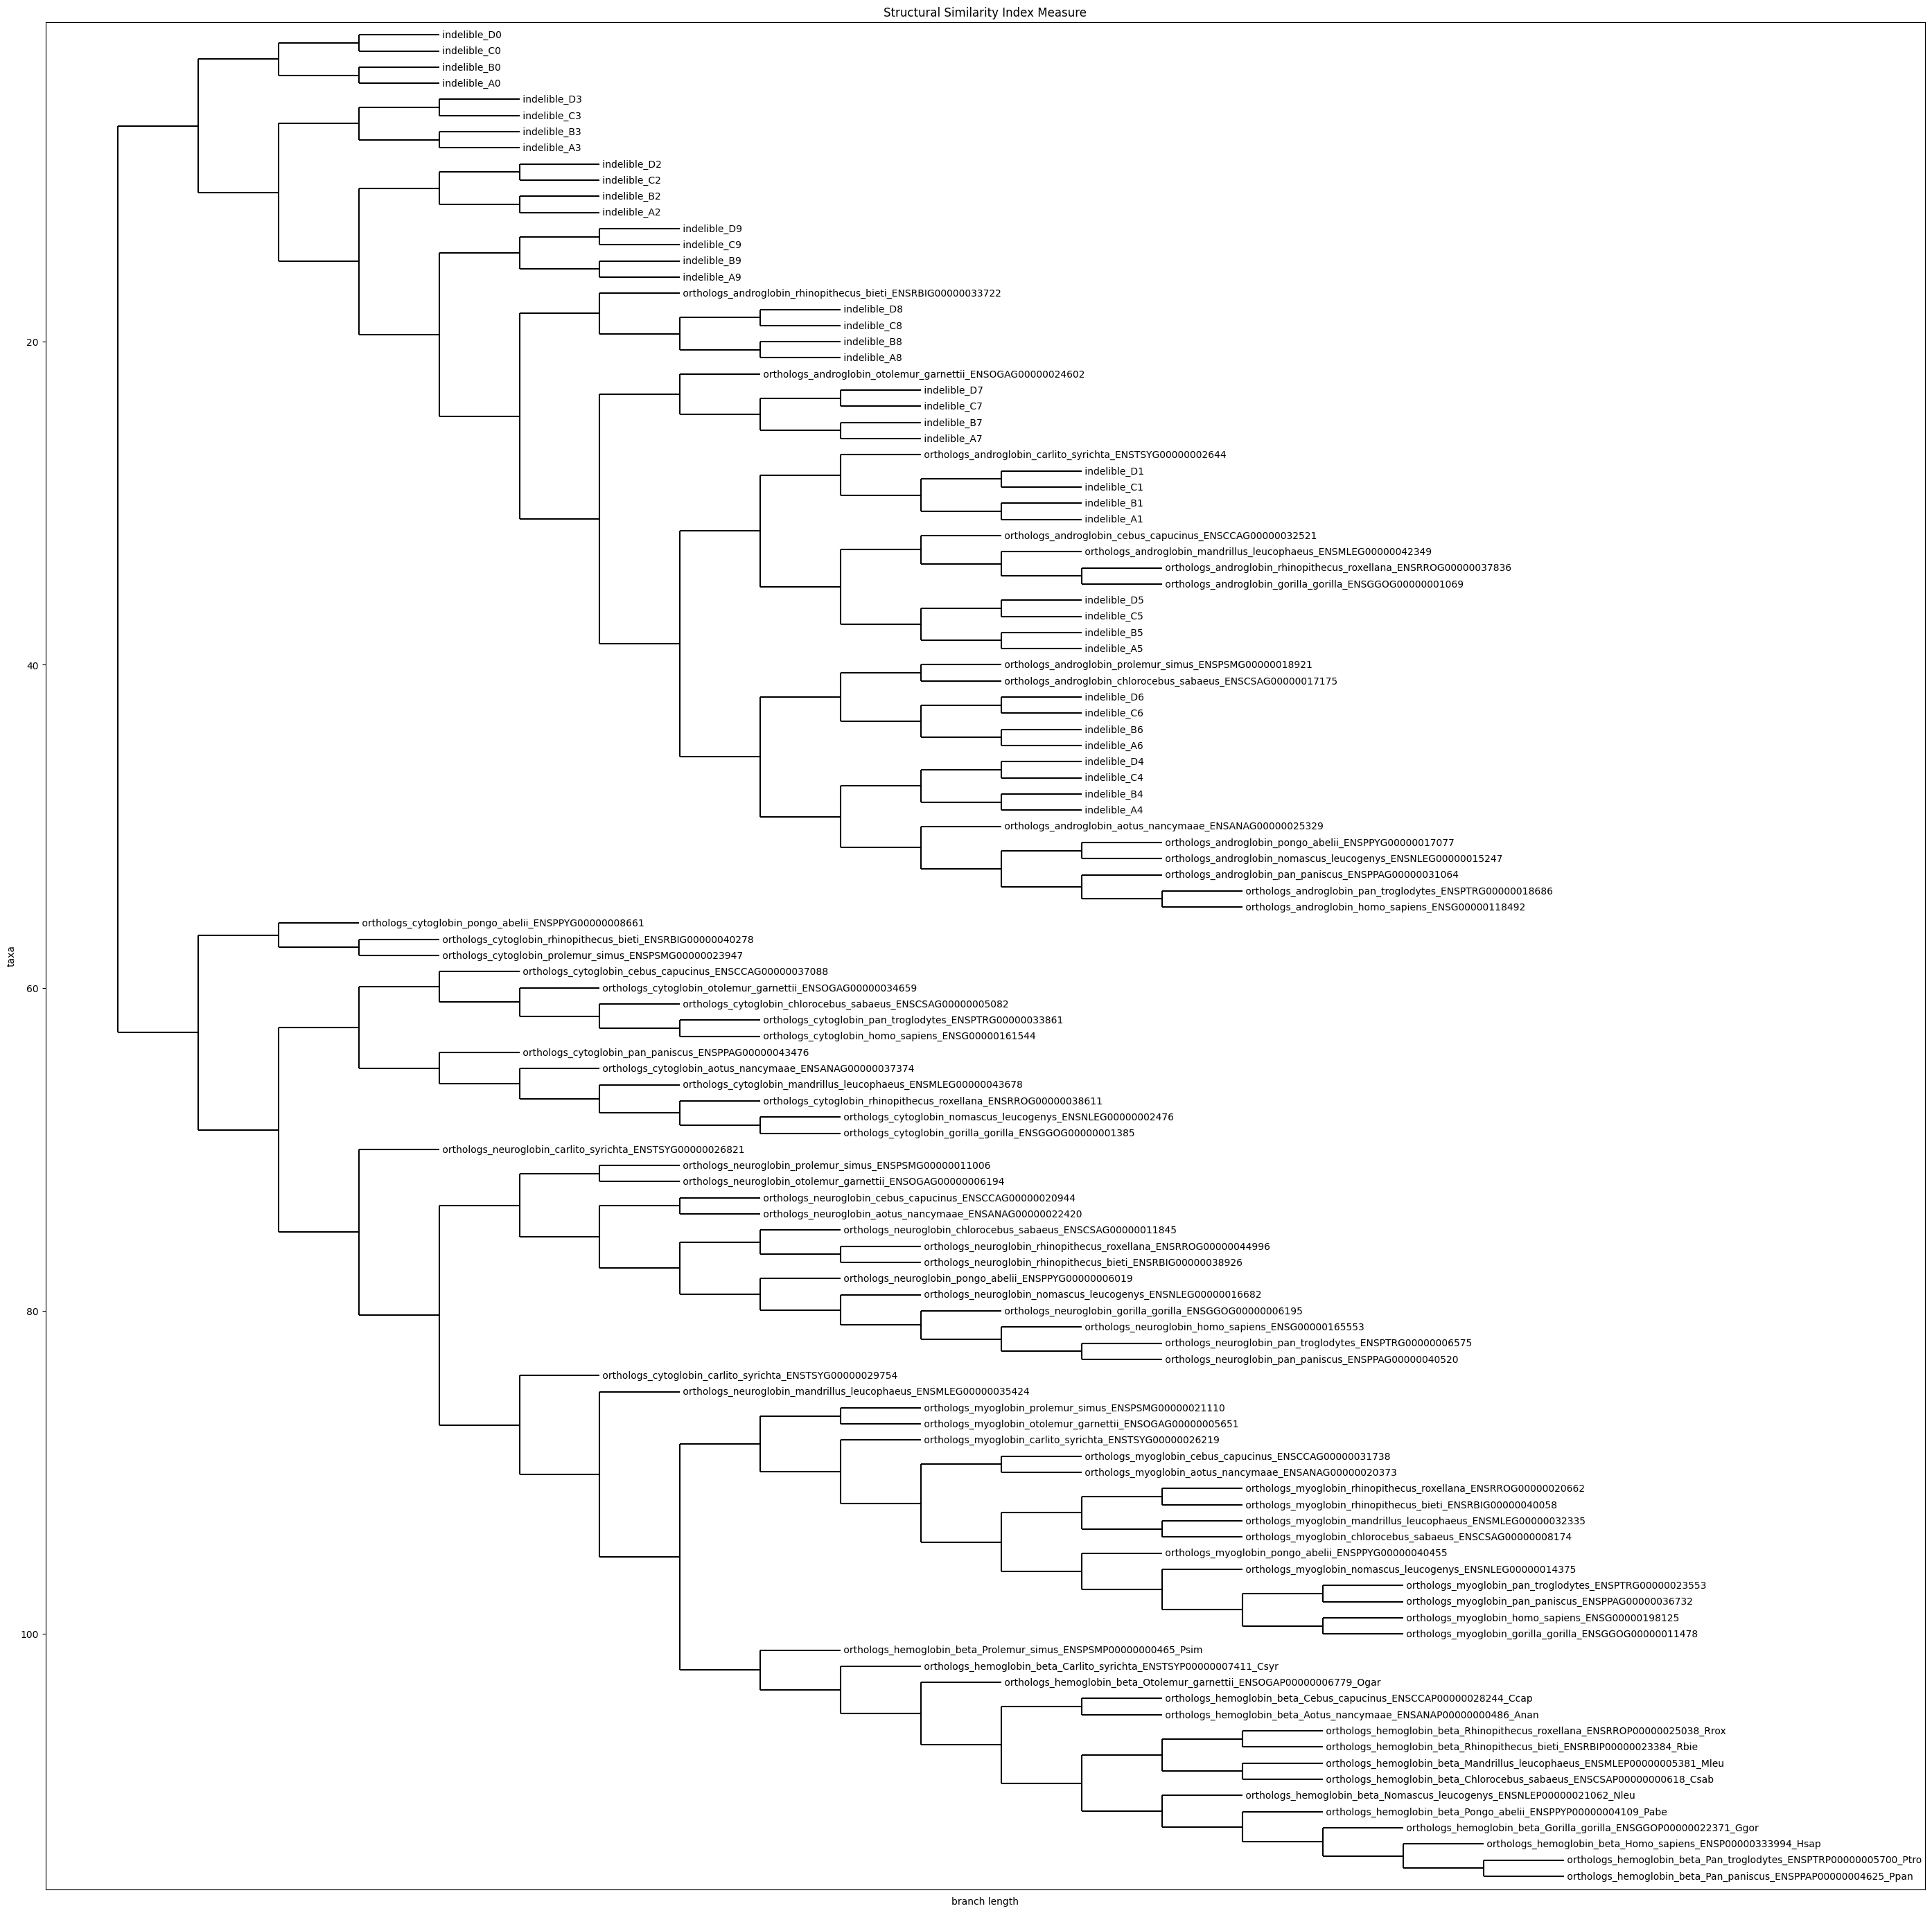

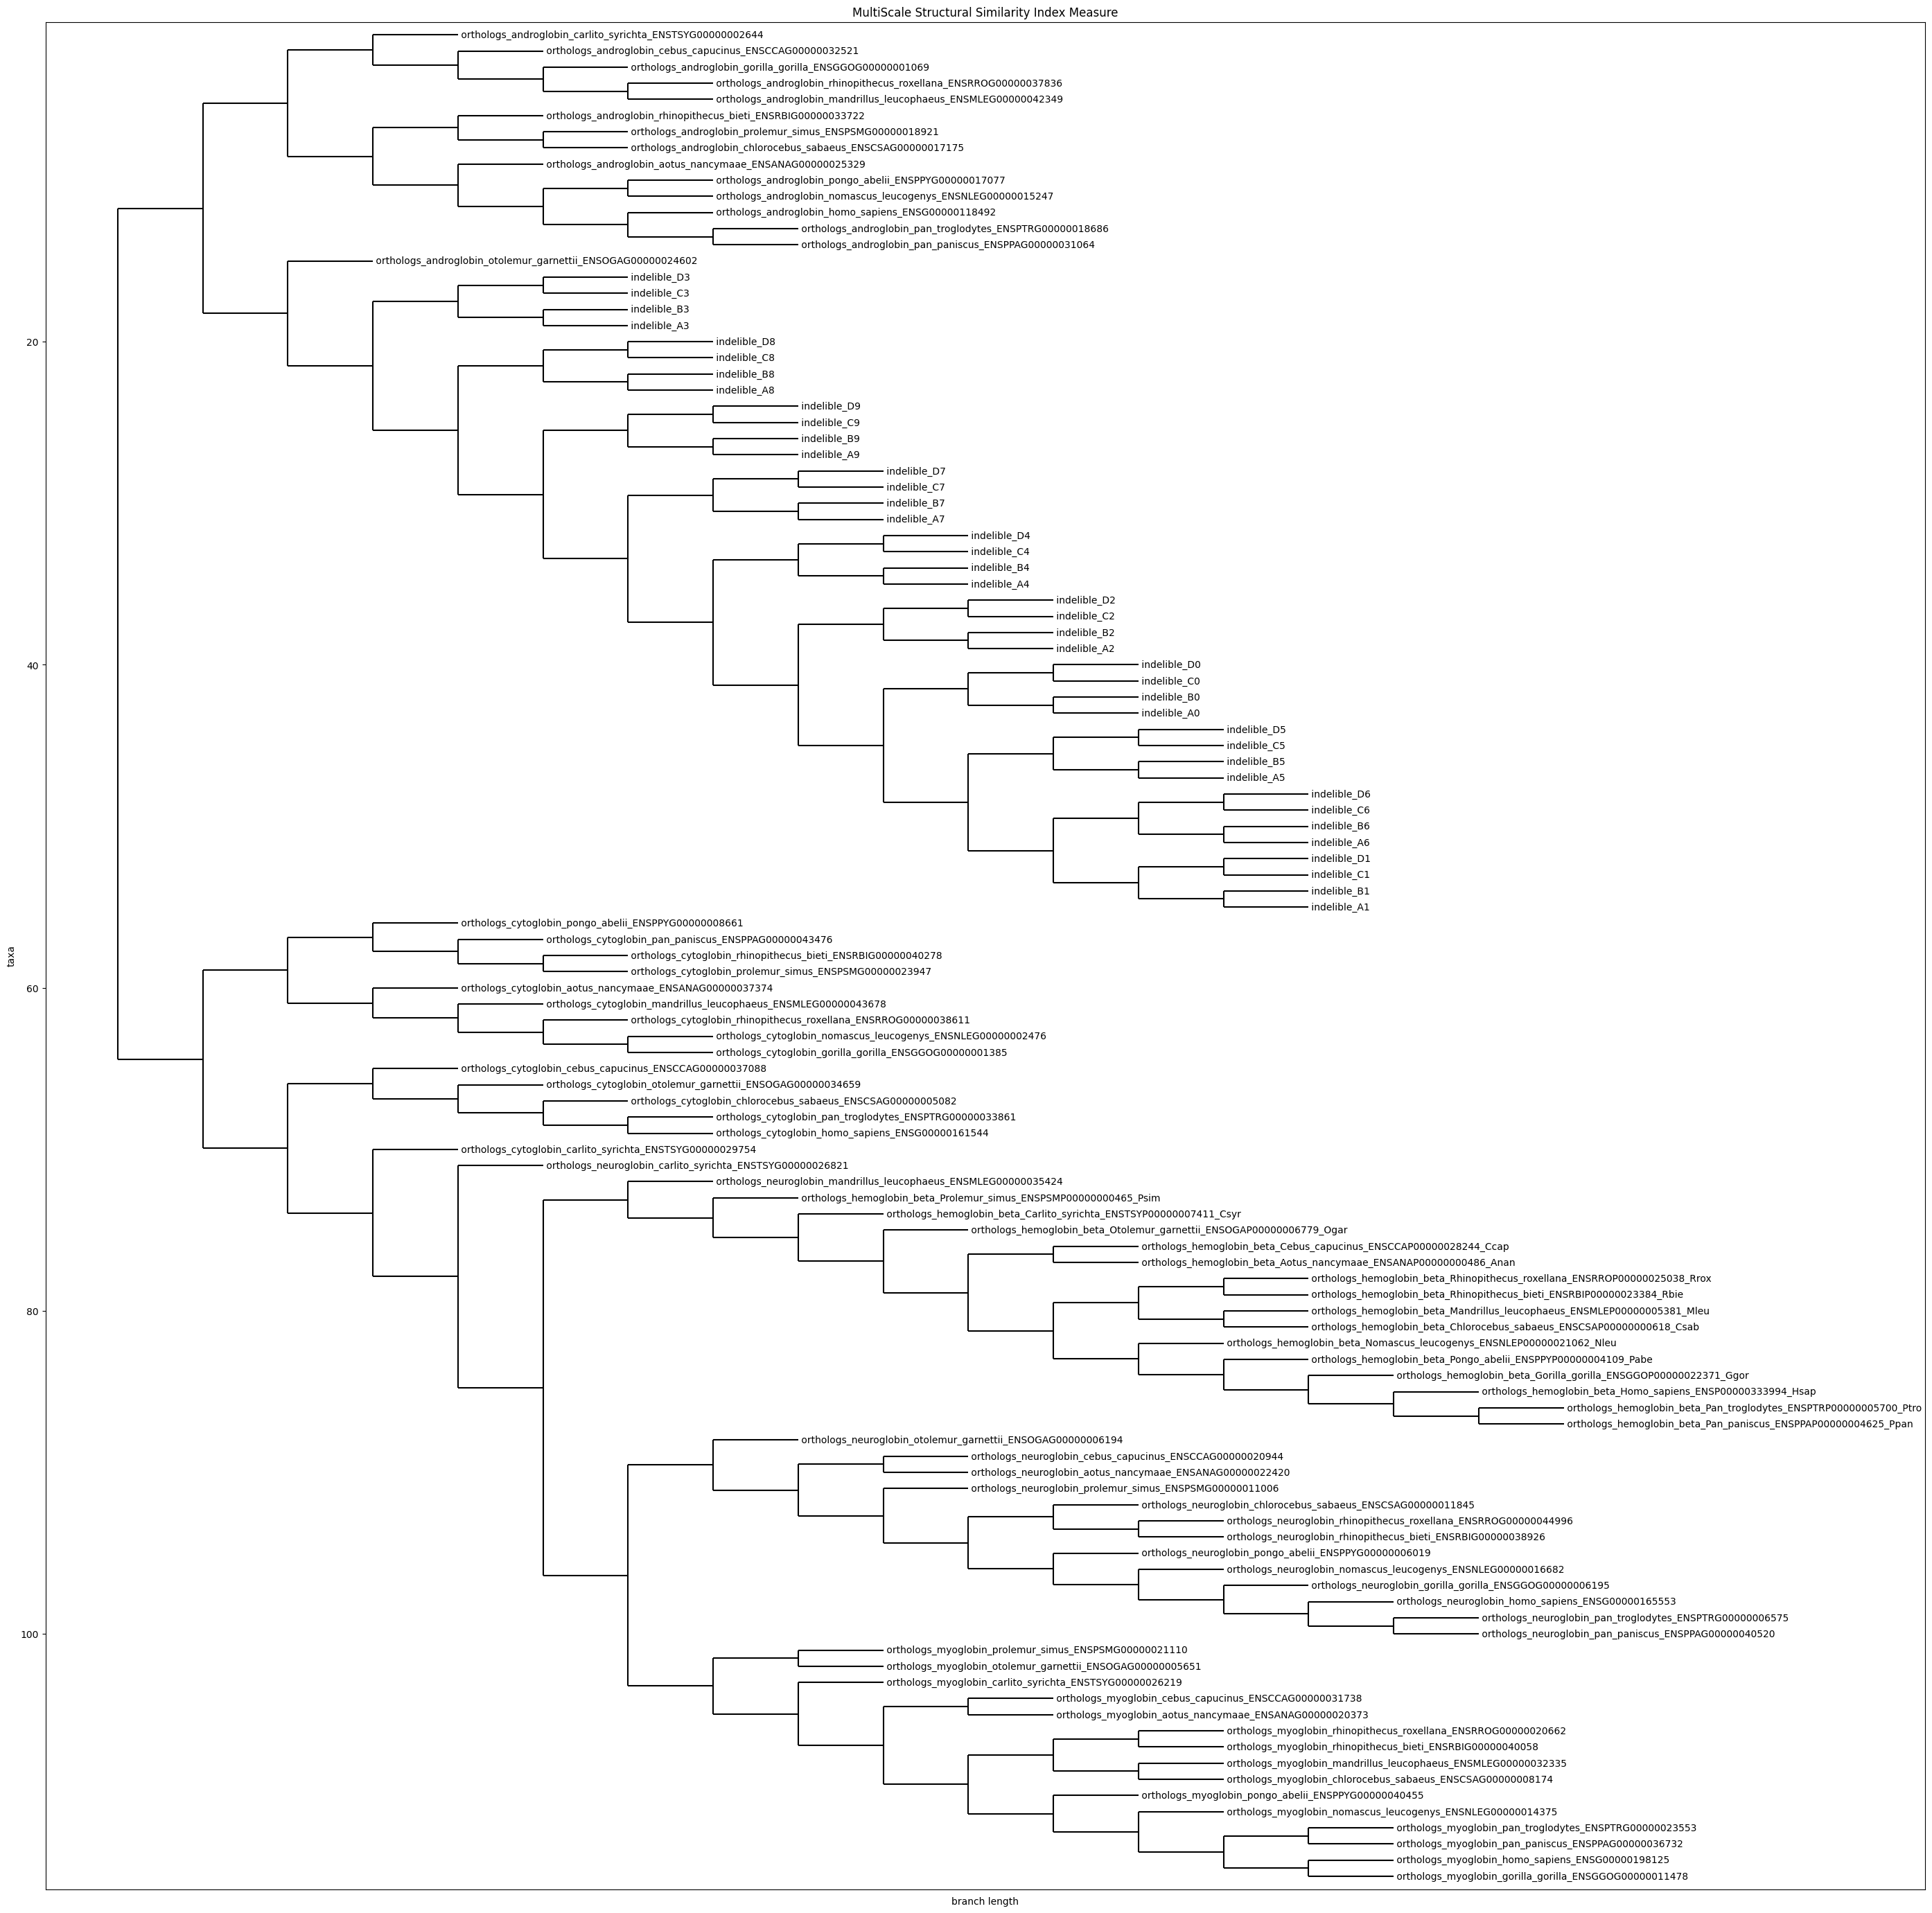

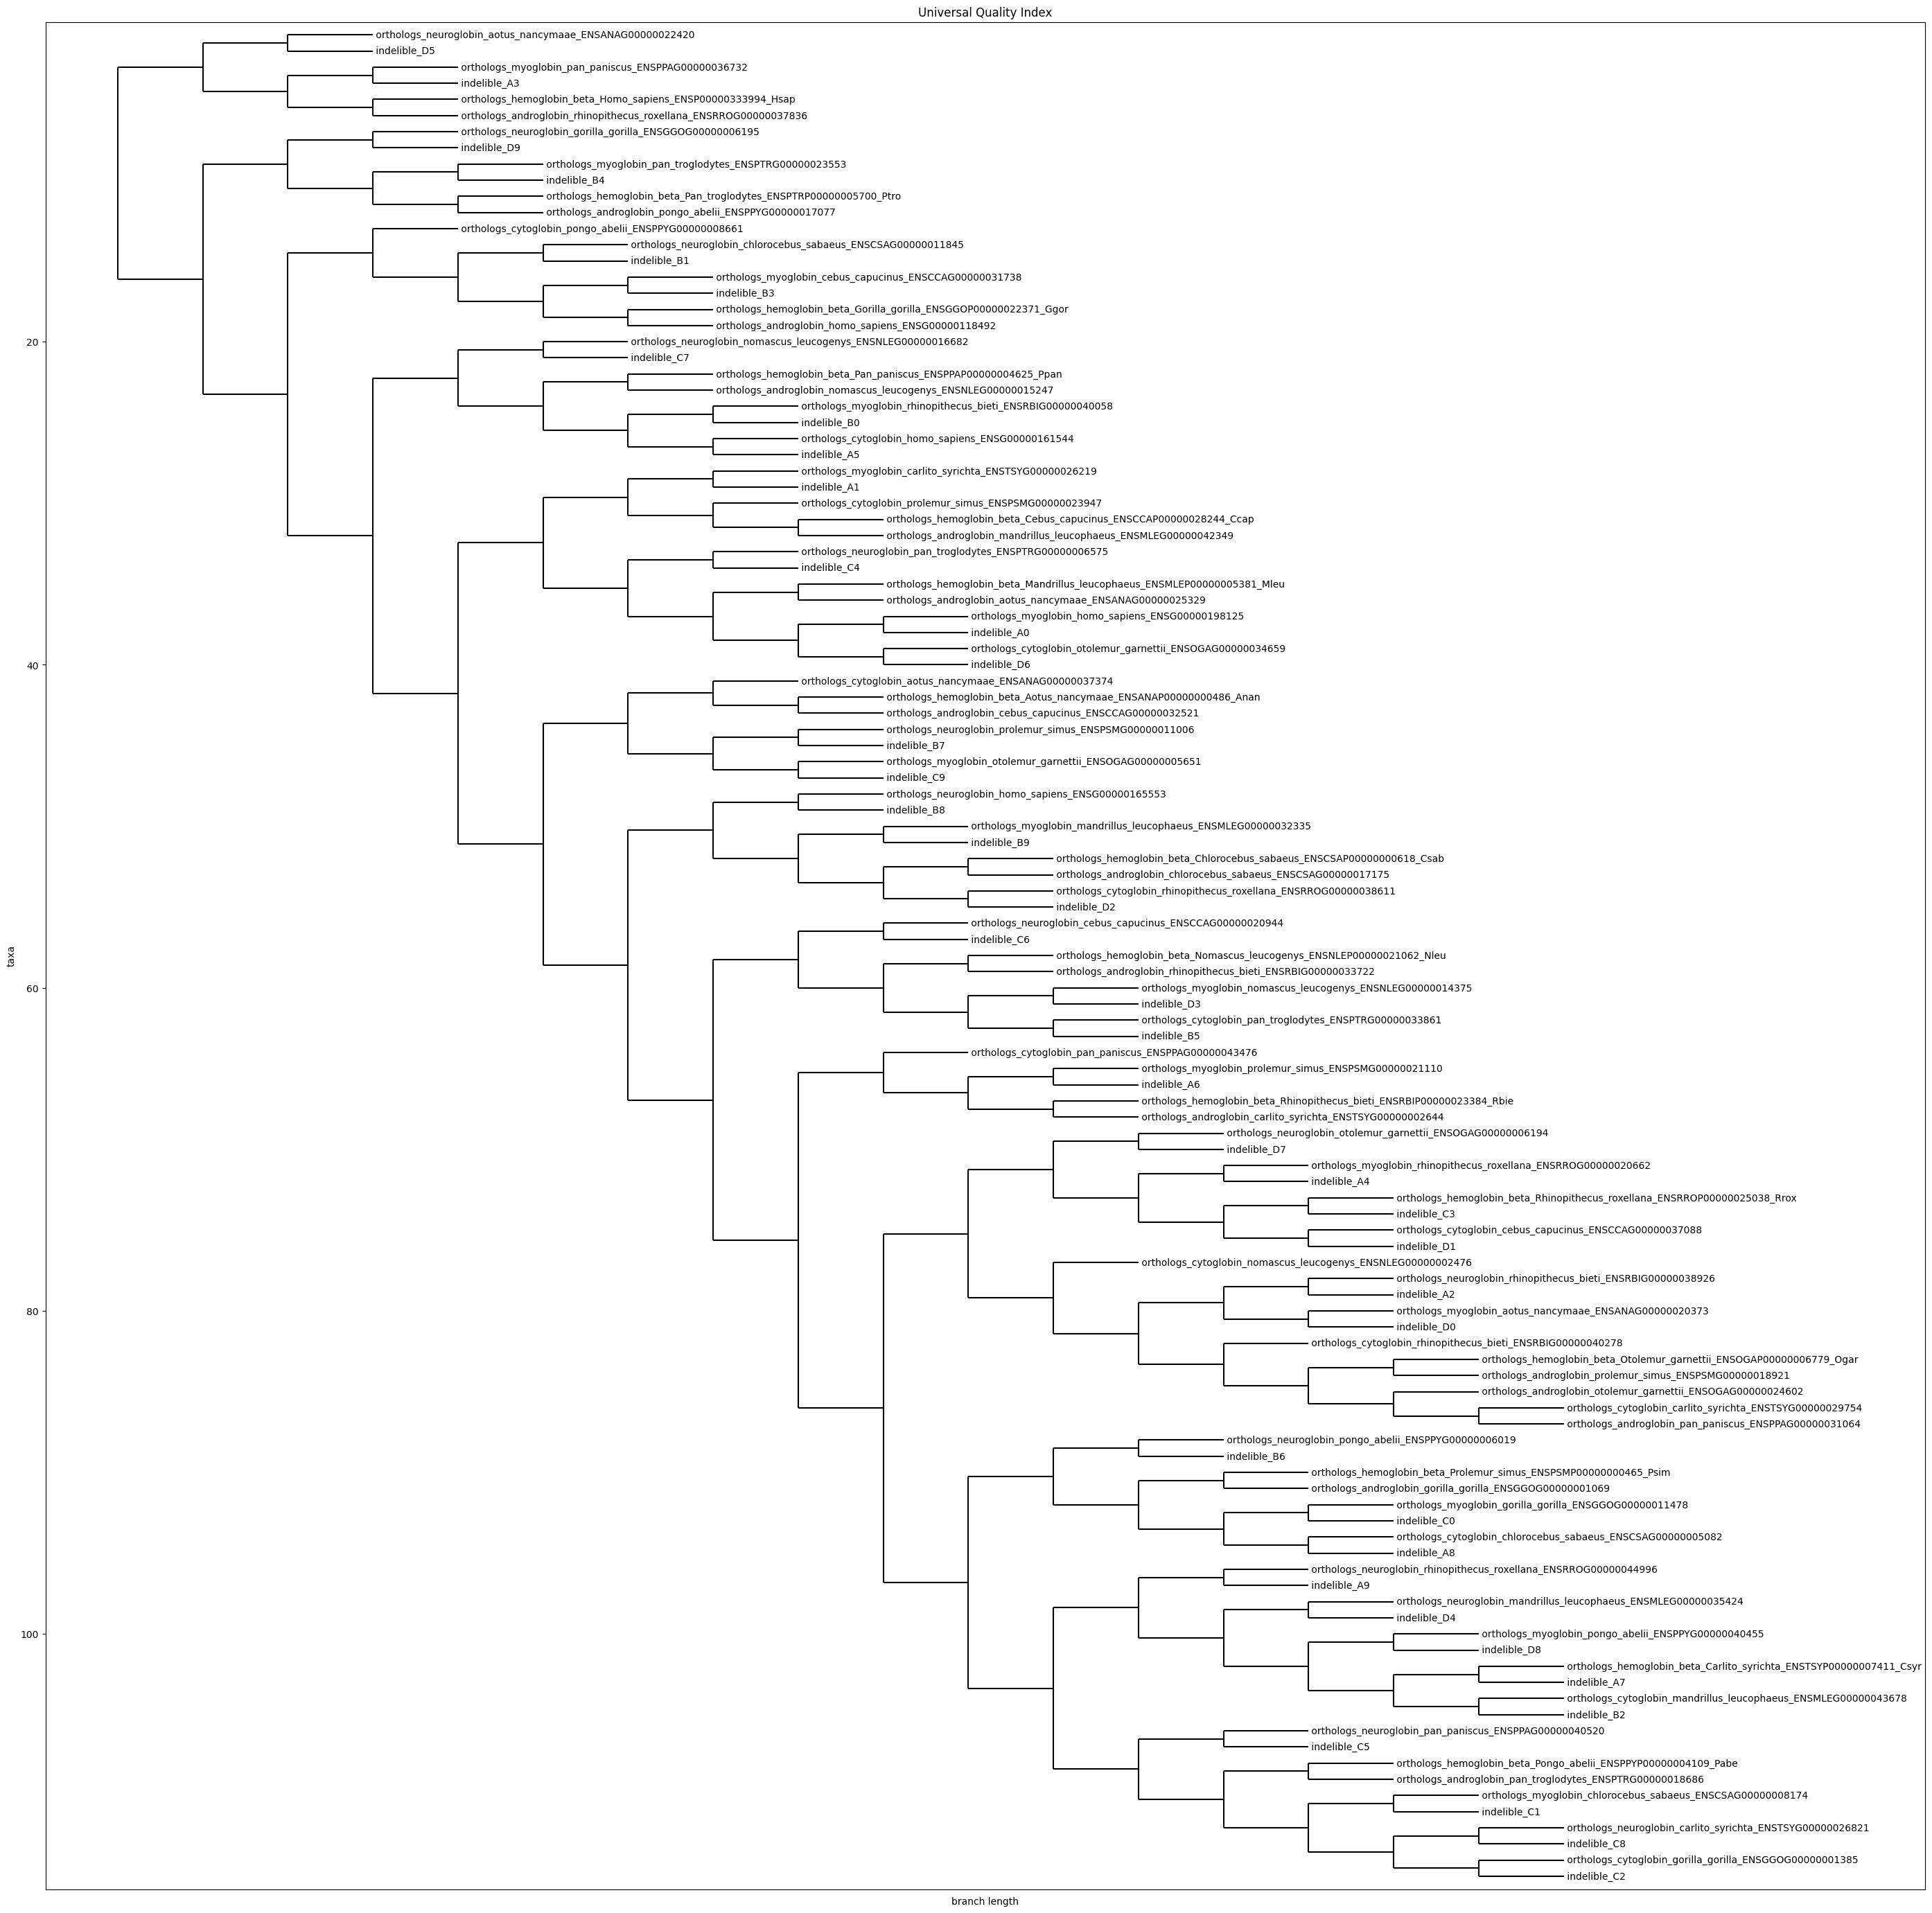

In [12]:
for alg, numpy_all in numpys_all.items():
    tree = upgma(1-numpy_all)
    fig, ax = pyplot.subplots(1, 1, figsize=(35, 35))
    newick = tree.to_newick(include_distance=False)
    t = Phylo.read(StringIO(newick), "newick")
    t.ladderize()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_title(alg)
    Phylo.draw(
        t,
        show_confidence=False,
        axes=ax,
        do_show=False,
        label_func=lambda clade: "" if not clade.name else list(fixed_dfs_all[alg].columns)[int(clade.name)],
        branch_labels=lambda clade: "" if not clade.name else "{:.2f}".format(
            clade.confidence) if clade.confidence else ""
    )
    pyplot.show()

In [13]:
for alg, fixed_df_all in fixed_dfs_all.items():
    by_homologues = {}
    only_homologues = {}
    for column in fixed_df_all.columns:
        name = column.split("_")[0] if len(column.split("_")) == 2 else column.split("_")[1]
        k = 40 if len(column.split("_")) == 2 else 14
        if name in by_homologues:
            by_homologues[name] += list(fixed_df_all[column].sort_values(ascending=False).index[:k])
            only_homologues[name] += [i.split("_")[0] if len(i.split("_")) == 2 else i.split("_")[1] for i in fixed_df_all[column].sort_values(ascending=False).index[:k]]
        else:
            by_homologues[name] = list(fixed_df_all[column].sort_values(ascending=False).index[:k])
            only_homologues[name] = [i.split("_")[0] if len(i.split("_")) == 2 else i.split("_")[1] for i in fixed_df_all[column].sort_values(ascending=False).index[:k]]

    #Precision
    print(f"--------{alg}--------")
    for h in only_homologues:
        print(h)
        print(sum([i==h for i in only_homologues[h]])/len(only_homologues[h]))

--------Structural Similarity Index Measure--------
indelible
0.625
androglobin
0.19047619047619047
cytoglobin
0.40476190476190477
hemoglobin
1.0
myoglobin
1.0
neuroglobin
0.7428571428571429
--------MultiScale Structural Similarity Index Measure--------
indelible
0.975
androglobin
0.8666666666666667
cytoglobin
0.5952380952380952
hemoglobin
1.0
myoglobin
1.0
neuroglobin
0.7619047619047619
--------Universal Quality Index--------
indelible
0.0
androglobin
0.0
cytoglobin
0.0
hemoglobin
0.0
myoglobin
0.0
neuroglobin
0.0


In [14]:
pandas.set_option('display.max_columns', 500) 
for alg, fixed_df_all in fixed_dfs_all.items():
    print(f"--------{alg}--------")
    display(fixed_df_all.describe())

--------Structural Similarity Index Measure--------


,indelible_A0,indelible_A1,indelible_A2,indelible_A3,indelible_A4,indelible_A5,indelible_A6,indelible_A7,indelible_A8,indelible_A9,indelible_B0,indelible_B1,indelible_B2,indelible_B3,indelible_B4,indelible_B5,indelible_B6,indelible_B7,indelible_B8,indelible_B9,indelible_C0,indelible_C1,indelible_C2,indelible_C3,indelible_C4,indelible_C5,indelible_C6,indelible_C7,indelible_C8,indelible_C9,indelible_D0,indelible_D1,indelible_D2,indelible_D3,indelible_D4,indelible_D5,indelible_D6,indelible_D7,indelible_D8,indelible_D9,orthologs_androglobin_aotus_nancymaae_ENSANAG00000025329,orthologs_androglobin_carlito_syrichta_ENSTSYG00000002644,orthologs_androglobin_cebus_capucinus_ENSCCAG00000032521,orthologs_androglobin_chlorocebus_sabaeus_ENSCSAG00000017175,orthologs_androglobin_gorilla_gorilla_ENSGGOG00000001069,orthologs_androglobin_homo_sapiens_ENSG00000118492,orthologs_androglobin_mandrillus_leucophaeus_ENSMLEG00000042349,orthologs_androglobin_nomascus_leucogenys_ENSNLEG00000015247,orthologs_androglobin_otolemur_garnettii_ENSOGAG00000024602,orthologs_androglobin_pan_paniscus_ENSPPAG00000031064,orthologs_androglobin_pan_troglodytes_ENSPTRG00000018686,orthologs_androglobin_pongo_abelii_ENSPPYG00000017077,orthologs_androglobin_prolemur_simus_ENSPSMG00000018921,orthologs_androglobin_rhinopithecus_bieti_ENSRBIG00000033722,orthologs_androglobin_rhinopithecus_roxellana_ENSRROG00000037836,orthologs_cytoglobin_aotus_nancymaae_ENSANAG00000037374,orthologs_cytoglobin_carlito_syrichta_ENSTSYG00000029754,orthologs_cytoglobin_cebus_capucinus_ENSCCAG00000037088,orthologs_cytoglobin_chlorocebus_sabaeus_ENSCSAG00000005082,orthologs_cytoglobin_gorilla_gorilla_ENSGGOG00000001385,orthologs_cytoglobin_homo_sapiens_ENSG00000161544,orthologs_cytoglobin_mandrillus_leucophaeus_ENSMLEG00000043678,orthologs_cytoglobin_nomascus_leucogenys_ENSNLEG00000002476,orthologs_cytoglobin_otolemur_garnettii_ENSOGAG00000034659,orthologs_cytoglobin_pan_paniscus_ENSPPAG00000043476,orthologs_cytoglobin_pan_troglodytes_ENSPTRG00000033861,orthologs_cytoglobin_pongo_abelii_ENSPPYG00000008661,orthologs_cytoglobin_prolemur_simus_ENSPSMG00000023947,orthologs_cytoglobin_rhinopithecus_bieti_ENSRBIG00000040278,orthologs_cytoglobin_rhinopithecus_roxellana_ENSRROG00000038611,orthologs_hemoglobin_beta_Aotus_nancymaae_ENSANAP00000000486_Anan,orthologs_hemoglobin_beta_Carlito_syrichta_ENSTSYP00000007411_Csyr,orthologs_hemoglobin_beta_Cebus_capucinus_ENSCCAP00000028244_Ccap,orthologs_hemoglobin_beta_Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,orthologs_hemoglobin_beta_Gorilla_gorilla_ENSGGOP00000022371_Ggor,orthologs_hemoglobin_beta_Homo_sapiens_ENSP00000333994_Hsap,orthologs_hemoglobin_beta_Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,orthologs_hemoglobin_beta_Nomascus_leucogenys_ENSNLEP00000021062_Nleu,orthologs_hemoglobin_beta_Otolemur_garnettii_ENSOGAP00000006779_Ogar,orthologs_hemoglobin_beta_Pan_paniscus_ENSPPAP00000004625_Ppan,orthologs_hemoglobin_beta_Pan_troglodytes_ENSPTRP00000005700_Ptro,orthologs_hemoglobin_beta_Pongo_abelii_ENSPPYP00000004109_Pabe,orthologs_hemoglobin_beta_Prolemur_simus_ENSPSMP00000000465_Psim,orthologs_hemoglobin_beta_Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,orthologs_hemoglobin_beta_Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,orthologs_myoglobin_aotus_nancymaae_ENSANAG00000020373,orthologs_myoglobin_carlito_syrichta_ENSTSYG00000026219,orthologs_myoglobin_cebus_capucinus_ENSCCAG00000031738,orthologs_myoglobin_chlorocebus_sabaeus_ENSCSAG00000008174,orthologs_myoglobin_gorilla_gorilla_ENSGGOG00000011478,orthologs_myoglobin_homo_sapiens_ENSG00000198125,orthologs_myoglobin_mandrillus_leucophaeus_ENSMLEG00000032335,orthologs_myoglobin_nomascus_leucogenys_ENSNLEG00000014375,orthologs_myoglobin_otolemur_garnettii_ENSOGAG00000005651,orthologs_myoglobin_pan_paniscus_ENSPPAG00000036732,orthologs_myoglobin_pan_troglodytes_ENSPTRG00000023553,orthologs_myoglobin_pongo_abelii_ENSPPYG00000040455,orthologs_myoglobin_prolemur_simus_ENSPSMG00000021110,orthologs_myoglobin

--------MultiScale Structural Similarity Index Measure--------


,indelible_A0,indelible_A1,indelible_A2,indelible_A3,indelible_A4,indelible_A5,indelible_A6,indelible_A7,indelible_A8,indelible_A9,indelible_B0,indelible_B1,indelible_B2,indelible_B3,indelible_B4,indelible_B5,indelible_B6,indelible_B7,indelible_B8,indelible_B9,indelible_C0,indelible_C1,indelible_C2,indelible_C3,indelible_C4,indelible_C5,indelible_C6,indelible_C7,indelible_C8,indelible_C9,indelible_D0,indelible_D1,indelible_D2,indelible_D3,indelible_D4,indelible_D5,indelible_D6,indelible_D7,indelible_D8,indelible_D9,orthologs_androglobin_aotus_nancymaae_ENSANAG00000025329,orthologs_androglobin_carlito_syrichta_ENSTSYG00000002644,orthologs_androglobin_cebus_capucinus_ENSCCAG00000032521,orthologs_androglobin_chlorocebus_sabaeus_ENSCSAG00000017175,orthologs_androglobin_gorilla_gorilla_ENSGGOG00000001069,orthologs_androglobin_homo_sapiens_ENSG00000118492,orthologs_androglobin_mandrillus_leucophaeus_ENSMLEG00000042349,orthologs_androglobin_nomascus_leucogenys_ENSNLEG00000015247,orthologs_androglobin_otolemur_garnettii_ENSOGAG00000024602,orthologs_androglobin_pan_paniscus_ENSPPAG00000031064,orthologs_androglobin_pan_troglodytes_ENSPTRG00000018686,orthologs_androglobin_pongo_abelii_ENSPPYG00000017077,orthologs_androglobin_prolemur_simus_ENSPSMG00000018921,orthologs_androglobin_rhinopithecus_bieti_ENSRBIG00000033722,orthologs_androglobin_rhinopithecus_roxellana_ENSRROG00000037836,orthologs_cytoglobin_aotus_nancymaae_ENSANAG00000037374,orthologs_cytoglobin_carlito_syrichta_ENSTSYG00000029754,orthologs_cytoglobin_cebus_capucinus_ENSCCAG00000037088,orthologs_cytoglobin_chlorocebus_sabaeus_ENSCSAG00000005082,orthologs_cytoglobin_gorilla_gorilla_ENSGGOG00000001385,orthologs_cytoglobin_homo_sapiens_ENSG00000161544,orthologs_cytoglobin_mandrillus_leucophaeus_ENSMLEG00000043678,orthologs_cytoglobin_nomascus_leucogenys_ENSNLEG00000002476,orthologs_cytoglobin_otolemur_garnettii_ENSOGAG00000034659,orthologs_cytoglobin_pan_paniscus_ENSPPAG00000043476,orthologs_cytoglobin_pan_troglodytes_ENSPTRG00000033861,orthologs_cytoglobin_pongo_abelii_ENSPPYG00000008661,orthologs_cytoglobin_prolemur_simus_ENSPSMG00000023947,orthologs_cytoglobin_rhinopithecus_bieti_ENSRBIG00000040278,orthologs_cytoglobin_rhinopithecus_roxellana_ENSRROG00000038611,orthologs_hemoglobin_beta_Aotus_nancymaae_ENSANAP00000000486_Anan,orthologs_hemoglobin_beta_Carlito_syrichta_ENSTSYP00000007411_Csyr,orthologs_hemoglobin_beta_Cebus_capucinus_ENSCCAP00000028244_Ccap,orthologs_hemoglobin_beta_Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,orthologs_hemoglobin_beta_Gorilla_gorilla_ENSGGOP00000022371_Ggor,orthologs_hemoglobin_beta_Homo_sapiens_ENSP00000333994_Hsap,orthologs_hemoglobin_beta_Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,orthologs_hemoglobin_beta_Nomascus_leucogenys_ENSNLEP00000021062_Nleu,orthologs_hemoglobin_beta_Otolemur_garnettii_ENSOGAP00000006779_Ogar,orthologs_hemoglobin_beta_Pan_paniscus_ENSPPAP00000004625_Ppan,orthologs_hemoglobin_beta_Pan_troglodytes_ENSPTRP00000005700_Ptro,orthologs_hemoglobin_beta_Pongo_abelii_ENSPPYP00000004109_Pabe,orthologs_hemoglobin_beta_Prolemur_simus_ENSPSMP00000000465_Psim,orthologs_hemoglobin_beta_Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,orthologs_hemoglobin_beta_Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,orthologs_myoglobin_aotus_nancymaae_ENSANAG00000020373,orthologs_myoglobin_carlito_syrichta_ENSTSYG00000026219,orthologs_myoglobin_cebus_capucinus_ENSCCAG00000031738,orthologs_myoglobin_chlorocebus_sabaeus_ENSCSAG00000008174,orthologs_myoglobin_gorilla_gorilla_ENSGGOG00000011478,orthologs_myoglobin_homo_sapiens_ENSG00000198125,orthologs_myoglobin_mandrillus_leucophaeus_ENSMLEG00000032335,orthologs_myoglobin_nomascus_leucogenys_ENSNLEG00000014375,orthologs_myoglobin_otolemur_garnettii_ENSOGAG00000005651,orthologs_myoglobin_pan_paniscus_ENSPPAG00000036732,orthologs_myoglobin_pan_troglodytes_ENSPTRG00000023553,orthologs_myoglobin_pongo_abelii_ENSPPYG00000040455,orthologs_myoglobin_prolemur_simus_ENSPSMG00000021110,orthologs_myoglobin

--------Universal Quality Index--------


,indelible_A0,indelible_A1,indelible_A2,indelible_A3,indelible_A4,indelible_A5,indelible_A6,indelible_A7,indelible_A8,indelible_A9,indelible_B0,indelible_B1,indelible_B2,indelible_B3,indelible_B4,indelible_B5,indelible_B6,indelible_B7,indelible_B8,indelible_B9,indelible_C0,indelible_C1,indelible_C2,indelible_C3,indelible_C4,indelible_C5,indelible_C6,indelible_C7,indelible_C8,indelible_C9,indelible_D0,indelible_D1,indelible_D2,indelible_D3,indelible_D4,indelible_D5,indelible_D6,indelible_D7,indelible_D8,indelible_D9,orthologs_androglobin_aotus_nancymaae_ENSANAG00000025329,orthologs_androglobin_carlito_syrichta_ENSTSYG00000002644,orthologs_androglobin_cebus_capucinus_ENSCCAG00000032521,orthologs_androglobin_chlorocebus_sabaeus_ENSCSAG00000017175,orthologs_androglobin_gorilla_gorilla_ENSGGOG00000001069,orthologs_androglobin_homo_sapiens_ENSG00000118492,orthologs_androglobin_mandrillus_leucophaeus_ENSMLEG00000042349,orthologs_androglobin_nomascus_leucogenys_ENSNLEG00000015247,orthologs_androglobin_otolemur_garnettii_ENSOGAG00000024602,orthologs_androglobin_pan_paniscus_ENSPPAG00000031064,orthologs_androglobin_pan_troglodytes_ENSPTRG00000018686,orthologs_androglobin_pongo_abelii_ENSPPYG00000017077,orthologs_androglobin_prolemur_simus_ENSPSMG00000018921,orthologs_androglobin_rhinopithecus_bieti_ENSRBIG00000033722,orthologs_androglobin_rhinopithecus_roxellana_ENSRROG00000037836,orthologs_cytoglobin_aotus_nancymaae_ENSANAG00000037374,orthologs_cytoglobin_carlito_syrichta_ENSTSYG00000029754,orthologs_cytoglobin_cebus_capucinus_ENSCCAG00000037088,orthologs_cytoglobin_chlorocebus_sabaeus_ENSCSAG00000005082,orthologs_cytoglobin_gorilla_gorilla_ENSGGOG00000001385,orthologs_cytoglobin_homo_sapiens_ENSG00000161544,orthologs_cytoglobin_mandrillus_leucophaeus_ENSMLEG00000043678,orthologs_cytoglobin_nomascus_leucogenys_ENSNLEG00000002476,orthologs_cytoglobin_otolemur_garnettii_ENSOGAG00000034659,orthologs_cytoglobin_pan_paniscus_ENSPPAG00000043476,orthologs_cytoglobin_pan_troglodytes_ENSPTRG00000033861,orthologs_cytoglobin_pongo_abelii_ENSPPYG00000008661,orthologs_cytoglobin_prolemur_simus_ENSPSMG00000023947,orthologs_cytoglobin_rhinopithecus_bieti_ENSRBIG00000040278,orthologs_cytoglobin_rhinopithecus_roxellana_ENSRROG00000038611,orthologs_hemoglobin_beta_Aotus_nancymaae_ENSANAP00000000486_Anan,orthologs_hemoglobin_beta_Carlito_syrichta_ENSTSYP00000007411_Csyr,orthologs_hemoglobin_beta_Cebus_capucinus_ENSCCAP00000028244_Ccap,orthologs_hemoglobin_beta_Chlorocebus_sabaeus_ENSCSAP00000000618_Csab,orthologs_hemoglobin_beta_Gorilla_gorilla_ENSGGOP00000022371_Ggor,orthologs_hemoglobin_beta_Homo_sapiens_ENSP00000333994_Hsap,orthologs_hemoglobin_beta_Mandrillus_leucophaeus_ENSMLEP00000005381_Mleu,orthologs_hemoglobin_beta_Nomascus_leucogenys_ENSNLEP00000021062_Nleu,orthologs_hemoglobin_beta_Otolemur_garnettii_ENSOGAP00000006779_Ogar,orthologs_hemoglobin_beta_Pan_paniscus_ENSPPAP00000004625_Ppan,orthologs_hemoglobin_beta_Pan_troglodytes_ENSPTRP00000005700_Ptro,orthologs_hemoglobin_beta_Pongo_abelii_ENSPPYP00000004109_Pabe,orthologs_hemoglobin_beta_Prolemur_simus_ENSPSMP00000000465_Psim,orthologs_hemoglobin_beta_Rhinopithecus_bieti_ENSRBIP00000023384_Rbie,orthologs_hemoglobin_beta_Rhinopithecus_roxellana_ENSRROP00000025038_Rrox,orthologs_myoglobin_aotus_nancymaae_ENSANAG00000020373,orthologs_myoglobin_carlito_syrichta_ENSTSYG00000026219,orthologs_myoglobin_cebus_capucinus_ENSCCAG00000031738,orthologs_myoglobin_chlorocebus_sabaeus_ENSCSAG00000008174,orthologs_myoglobin_gorilla_gorilla_ENSGGOG00000011478,orthologs_myoglobin_homo_sapiens_ENSG00000198125,orthologs_myoglobin_mandrillus_leucophaeus_ENSMLEG00000032335,orthologs_myoglobin_nomascus_leucogenys_ENSNLEG00000014375,orthologs_myoglobin_otolemur_garnettii_ENSOGAG00000005651,orthologs_myoglobin_pan_paniscus_ENSPPAG00000036732,orthologs_myoglobin_pan_troglodytes_ENSPTRG00000023553,orthologs_myoglobin_pongo_abelii_ENSPPYG00000040455,orthologs_myoglobin_prolemur_simus_ENSPSMG00000021110,orthologs_myoglobin